In [35]:
import torch
from torch import nn 
import matplotlib.pyplot as plt

In [36]:
# Creating the known parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Creating a training and testing set

In [37]:
train_split = int(0.8 * len(X))
train_split

40

In [38]:
X_train, y_train = X[:train_split] , y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualizing the data

In [39]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14})

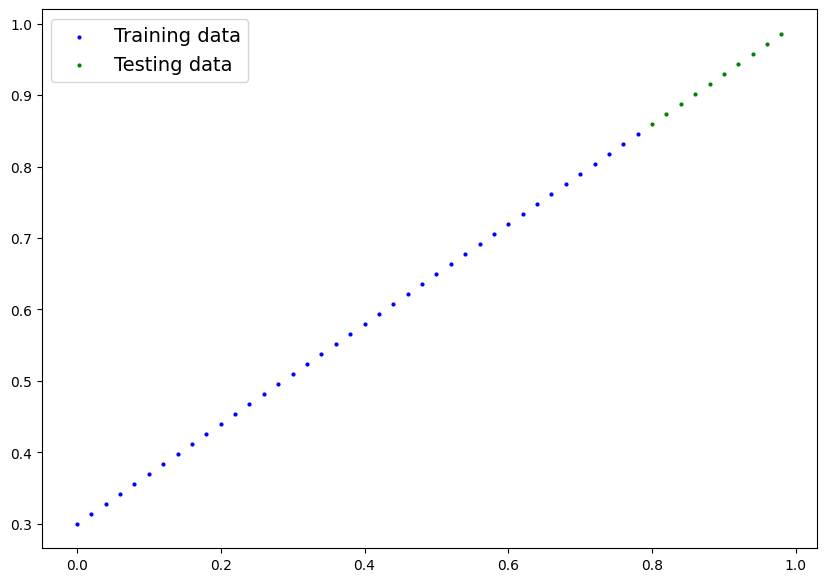

In [40]:
plot_prediction()

## Building the first pytorch model

In [41]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [42]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [43]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [44]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [45]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [46]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

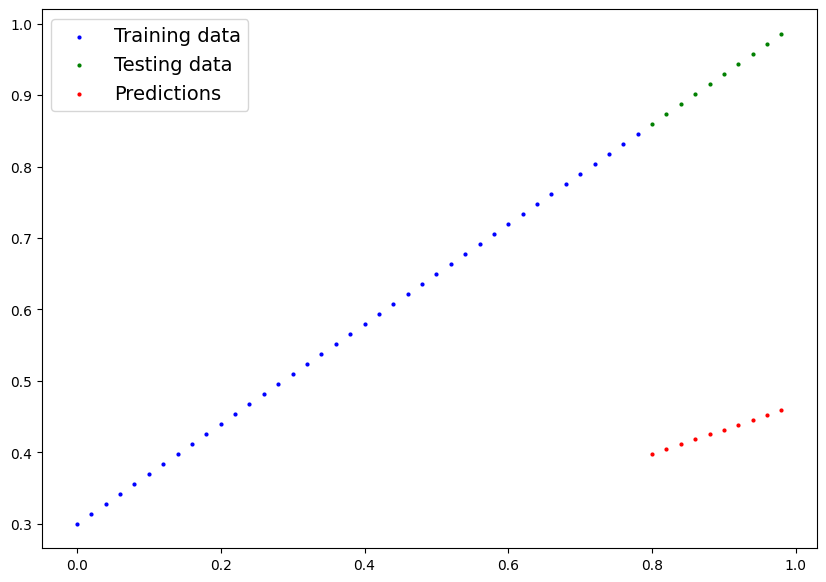

In [47]:
plot_prediction(predictions=y_preds)

## Terms:

A loss function is a function that measures how wrong your prediction is. It may also be called "cost function"

An optimizer takes in account the loss of a model and adjusts the models parameters to improve the loss function

In [48]:
# Setting up a loss function
loss_fn = nn.L1Loss()

# Setting up the optimizer (Using gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001)

## Training loop

1. Loop through the data
2. Forward pass (this involves passing the data through the forward function). Also called forward propagation
3. Calculate the loss
4. Optimize the zero grad
5. loss backward - backpropagation
6. Optimizer step- use the optimizer to improve the loss (gradient descent)


In [49]:
# An epoch is one loop through the data
epochs = 5000

epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
    
    # 1. Forward pass
    y_pred = model_0(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Proform backpropagation
    loss.backward()
    
    # 5. Set the optimizer
    optimizer.step()
    
    model_0.eval() # turns off gradient tracking
    with torch.inference_mode():
        test_pred = model_0(X_test)
        
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.4931890368461609
Epoch: 10 | Loss: 0.3013603389263153 | Test Loss: 0.4797181189060211
Epoch: 20 | Loss: 0.28983938694000244 | Test Loss: 0.4662471413612366
Epoch: 30 | Loss: 0.2783183455467224 | Test Loss: 0.4527761936187744
Epoch: 40 | Loss: 0.26679736375808716 | Test Loss: 0.43930521607398987
Epoch: 50 | Loss: 0.2552763819694519 | Test Loss: 0.4258342385292053
Epoch: 60 | Loss: 0.24375538527965546 | Test Loss: 0.41236335039138794
Epoch: 70 | Loss: 0.232234388589859 | Test Loss: 0.398892343044281
Epoch: 80 | Loss: 0.22071340680122375 | Test Loss: 0.38542139530181885
Epoch: 90 | Loss: 0.2091923952102661 | Test Loss: 0.3719504475593567
Epoch: 100 | Loss: 0.19767141342163086 | Test Loss: 0.35847947001457214
Epoch: 110 | Loss: 0.18615040183067322 | Test Loss: 0.34500852227211
Epoch: 120 | Loss: 0.17462942004203796 | Test Loss: 0.33153754472732544
Epoch: 130 | Loss: 0.16310855746269226 | Test Loss: 0.3180667459964752
Epoch: 140 | Loss: 0.

In [50]:
from pprint import pprint
print("The model learned the following values for weights and bias: ")
pprint(model_0.state_dict())
print("\nAnd and the orginial values for weights and bais are: ")
print(f"weights: {weight}, bais: {bias}")

The model learned the following values for weights and bias: 
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

And and the orginial values for weights and bais are: 
weights: 0.7, bais: 0.3


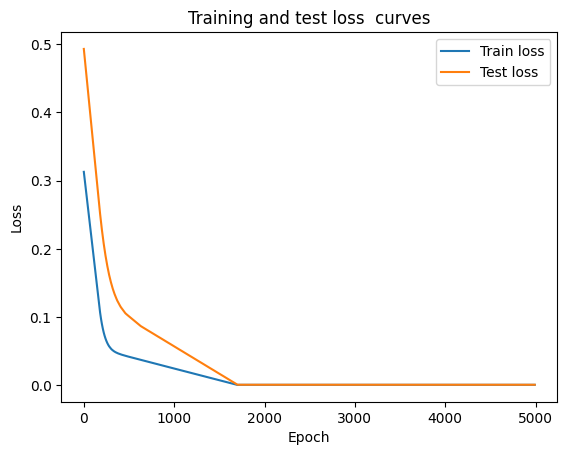

In [51]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss  curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

In [52]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [53]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [54]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

y_preds_new

tensor([[0.8593],
        [0.8733],
        [0.8873],
        [0.9013],
        [0.9152],
        [0.9292],
        [0.9432],
        [0.9572],
        [0.9712],
        [0.9852]])

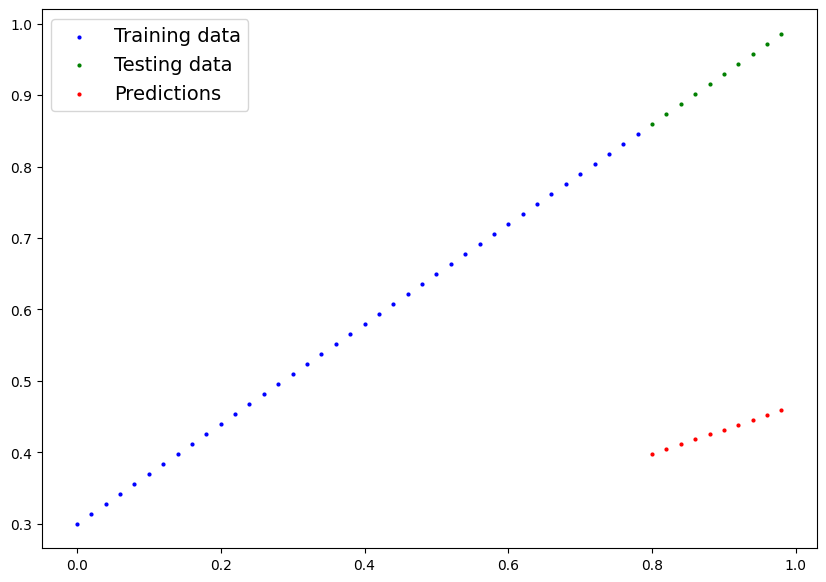

In [55]:
plot_prediction(predictions=y_preds)

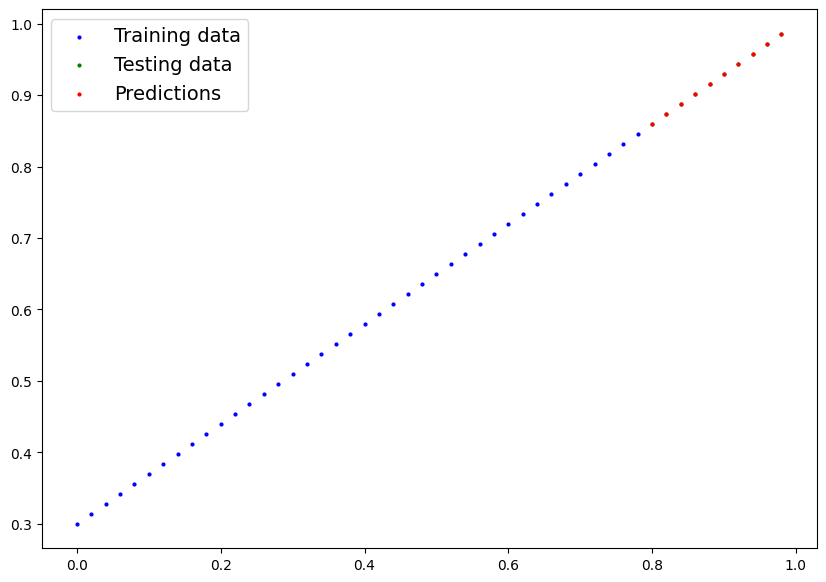

In [56]:
plot_prediction(predictions=y_preds_new)

In [57]:
# Saving the model

from pathlib import Path

# 1. Create the models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

In [58]:
# Check the saved file path
!ls -l models/pytorch_workflow_model_0.pth

-rw-r--r--  1 maximilianstrey  staff  1662 May 29 14:35 models/pytorch_workflow_model_0.pth


In [59]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [60]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [61]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [62]:
# Testing the predictions
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8593],
        [0.8733],
        [0.8873],
        [0.9013],
        [0.9152],
        [0.9292],
        [0.9432],
        [0.9572],
        [0.9712],
        [0.9852]])

In [63]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

In [64]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])